In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost import XGBRegressor



## Read Data

In [365]:
df=pd.read_csv('dataset.csv')
df.head()

,mark,model,description,fuel,km,year,gearbox,isofix,led,cruise_control,bluetooth,auto_clim,rear_cam,rear_rad,price
0,CITROEN,C3,PureTech 82ch Shine S&S E6.d,Essence /,17 860 km,/ 2019 /,Manuelle,1,0,1,0,1,0,1,12 799 €
1,RENAULT,Zoe,Zen charge normale R110 Achat Intégral - 20,Electrique /,50 065 km,/ 2020 /,Automatique,1,1,1,1,1,0,0,12 799 €
2,PEUGEOT,3008,HYBRID4 300ch GT Pack e-EAT8,Hybride /,14 456 km,/ 2021 /,Automatique,0,1,1,1,1,1,1,12 799 €
3,PEUGEOT,2008,1.2 PureTech 130ch S&S Style EAT8,Essence /,31 658 km,/ 2022 /,Automatique,1,1,1,1,1,0,1,12 799 €
4,DACIA,Sandero,1.0 ECO-G 100ch Stepway Expression +,Gpl /,13 344 km,/ 2023 /,Manuelle,0,1,1,1,1,1,1,12 799 €


In [366]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns" )

The dataset contains 14264 rows and 15 columns


## Verifying and converting data types

In [367]:
df.dtypes

mark              object
model             object
description       object
fuel              object
km                object
year              object
gearbox           object
isofix             int64
led                int64
cruise_control     int64
bluetooth          int64
auto_clim          int64
rear_cam           int64
rear_rad           int64
price             object
dtype: object

In [368]:
df['price']=df['price'].str.replace("€","")
df['price']=df['price'].str.replace(",","")
df['price']=df['price'].str.replace(" ","")

In [369]:
df['price']=pd.to_numeric(df['price'])

In [370]:
df['km']=df['km'].str.replace(" ","")
df['km']=df['km'].str.replace("km","")
df['km']=pd.to_numeric(df['km'])

In [371]:
df['year']=df['year'].str.replace("/","")
df['year']=pd.to_numeric(df['year'])

In [372]:
df['price']=pd.to_numeric(df['price'],errors='coerce')

In [373]:
df.dtypes

mark              object
model             object
description       object
fuel              object
km                 int64
year               int64
gearbox           object
isofix             int64
led                int64
cruise_control     int64
bluetooth          int64
auto_clim          int64
rear_cam           int64
rear_rad           int64
price              int64
dtype: object

Now that all our data types have been converted to appropriate types, we can move on to exploring the data

## Data Exploring

### Univariate analysis

### The Most Common Car Brands in Our Dataset

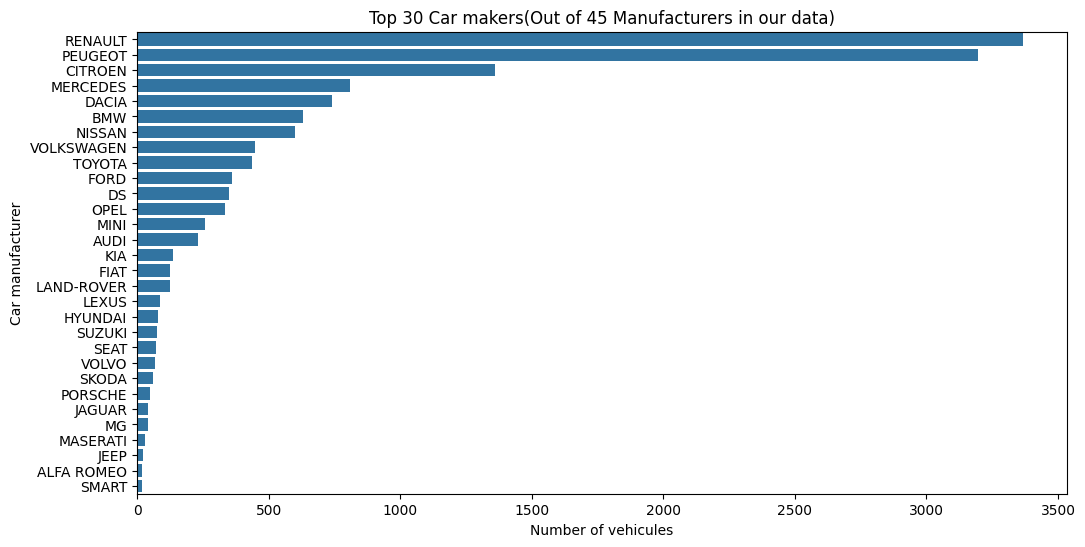

In [374]:
top_marks=df['mark'].value_counts().head(30)
plt.figure(figsize=(12,6))
sns.barplot(x=top_marks.values,y=top_marks.index)
plt.ylabel("Car manufacturer")
plt.xlabel("Number of vehicules")
plt.title("Top 30 Car makers(Out of 45 Manufacturers in our data)")
plt.show()


### Top models in our dataset

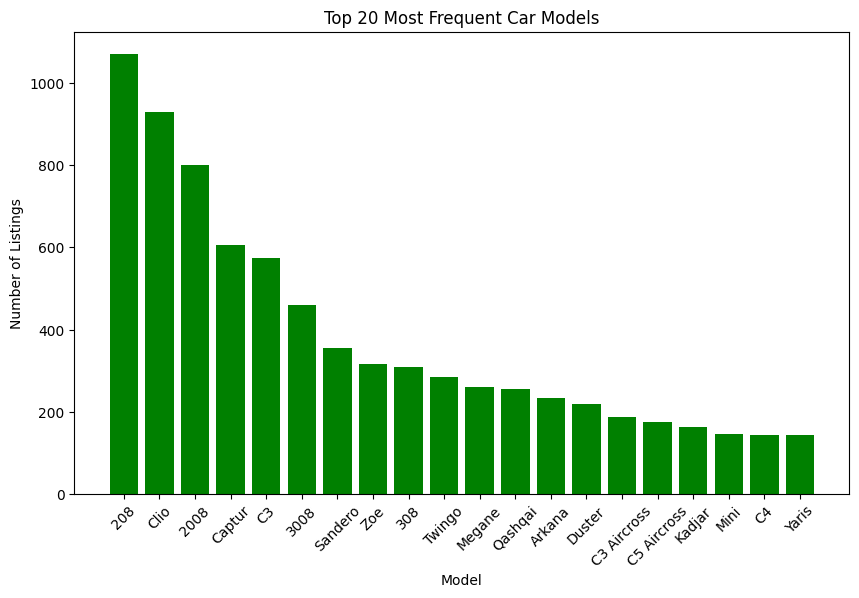

In [375]:
top_models = df['model'].value_counts().head(20)  # Top 10 most frequent models
plt.figure(figsize=(10, 6))
plt.bar(top_models.index, top_models.values, color='Green')
plt.title("Top 20 Most Frequent Car Models")
plt.xlabel("Model")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

In [376]:
df['fuel'].value_counts()

fuel
Essence /       6272
Diesel /        2989
Electrique /    1690
Hybride /       1071
Hybride R /     1026
Essence M /      735
Gpl /            275
Diesel M /       149
Essence B /       52
/                  3
Gnv /              2
Name: count, dtype: int64

There was an error during data collection, so we simplified these categories into 6 classes:  
 Essence, Diesel, Hybride, Electrique, GPL and GNV (Gaz Naturel pour Véhicules).

In [377]:
df['fuel']=df['fuel'].str.replace('Essence /','Essence')
df['fuel']=df['fuel'].str.replace('Essence M /','Essence')
df['fuel']=df['fuel'].str.replace('Essence B /','Essence')

In [378]:
df['fuel']=df['fuel'].str.replace('Diesel /','Diesel')
df['fuel']=df['fuel'].str.replace('Diesel M /','Diesel')
df['fuel']=df['fuel'].str.replace('Diesel B /','Diesel')

In [379]:
df['fuel']=df['fuel'].str.replace('Electrique /','Electrique') 
df['fuel']=df['fuel'].str.replace('Gpl /','Gpl')
df['fuel']=df['fuel'].str.replace('Gnv /','Gnv')

In [380]:
df['fuel']=df['fuel'].str.replace('Hybride /','Hybride')
df['fuel']=df['fuel'].str.replace('Hybride R /','Hybride')
df['fuel']=df['fuel'].str.replace('Hybride M /','Hybride')

In [381]:
df=df[df['fuel']!='/']
df=df[df['fuel']!='Gnv']

We deleted vehicules with Gnv because there is only 2 observations with this type of fuel

Now, let's see The Categories

In [382]:
df['fuel'].value_counts()

fuel
Essence       7059
Diesel        3138
Hybride       2097
Electrique    1690
Gpl            275
Name: count, dtype: int64

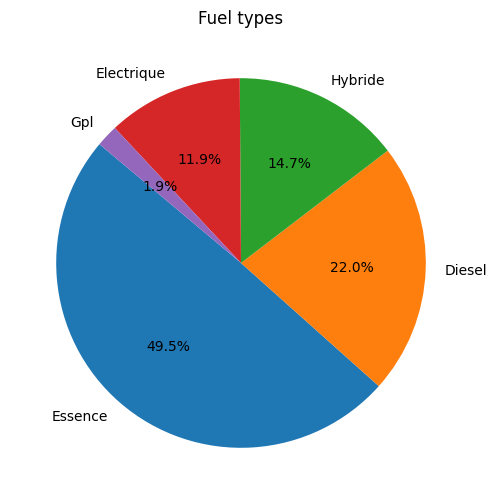

In [383]:
fuel_count=df['fuel'].value_counts().head()
plt.figure(figsize=(8,6))
plt.pie(fuel_count,labels=fuel_count.index,autopct='%1.1f%%', startangle=140)
plt.title("Fuel types")
plt.show()

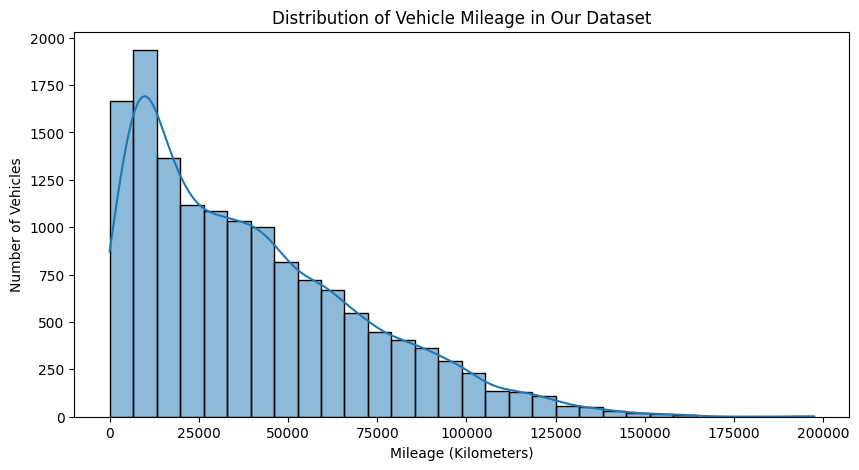

In [384]:
plt.figure(figsize=(10,5))
sns.histplot(df['km'], bins=30, kde=True)
plt.xlabel('Mileage (Kilometers)')
plt.ylabel('Number of Vehicles')
plt.title("Distribution of Vehicle Mileage in Our Dataset")
plt.show()

### Number of Vehicles for Sale by Year

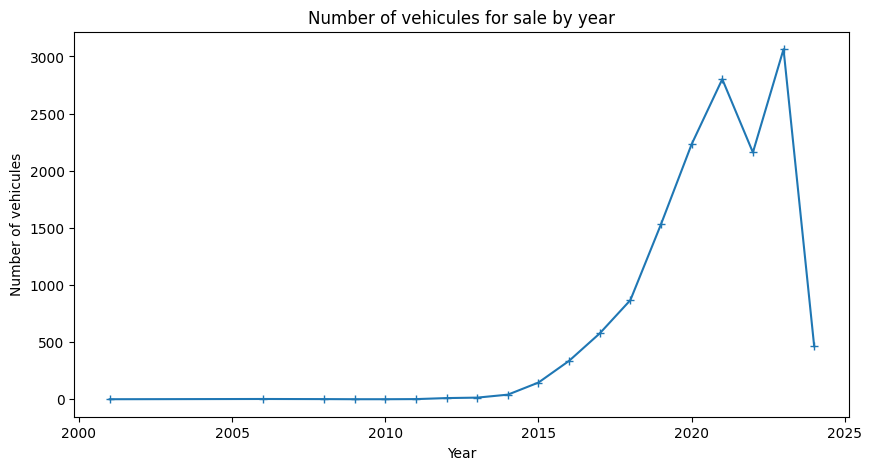

In [385]:
vehicule_count=df['year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
vehicule_count.plot(kind='line',marker='+')
plt.xlabel('Year')
plt.ylabel('Number of vehicules')
plt.title('Number of vehicules for sale by year')
plt.show()


### Distribution of Vehicles by Gearbox Type

In [386]:
#df=pd.get_dummies(df,columns=['gearbox','mark'],drop_first=True)


In [387]:
gearbox_count=df['gearbox'].value_counts()

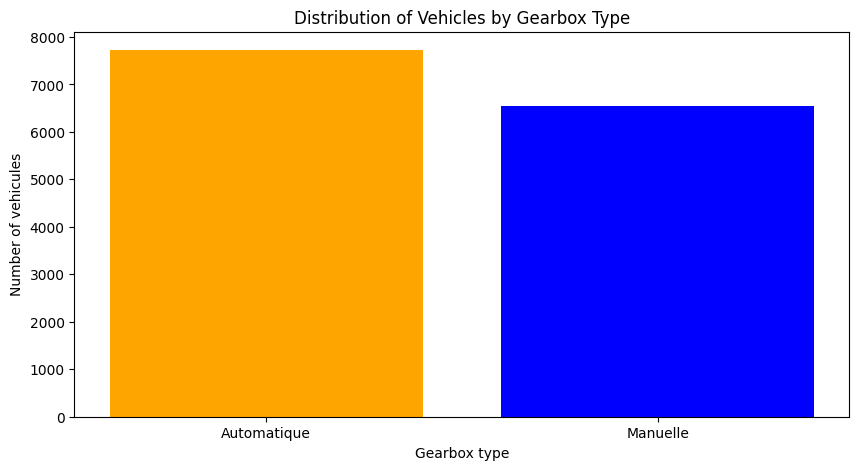

In [388]:
plt.figure(figsize=(10,5))
plt.bar(gearbox_count.index,gearbox_count.values,color=['orange','blue'])
plt.ylabel("Number of vehicules")
plt.xlabel('Gearbox type')
plt.title('Distribution of Vehicles by Gearbox Type')
plt.show()

### The distribution of the price of used vehicules

Text(0.5, 1.0, 'Car prices distribution')

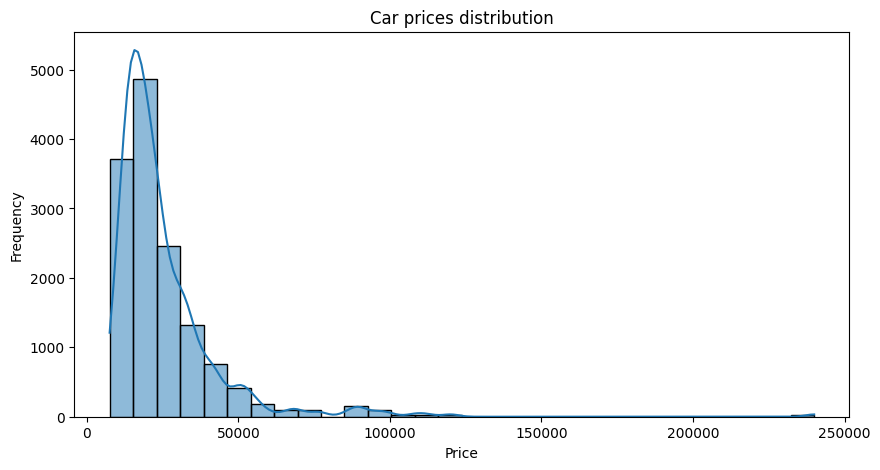

In [389]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'],bins=30,kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Car prices distribution')

## Bivariate Analysis

### Average price for each Car manufacturer

In [390]:
mean_prices = df.groupby('mark')['price'].mean()

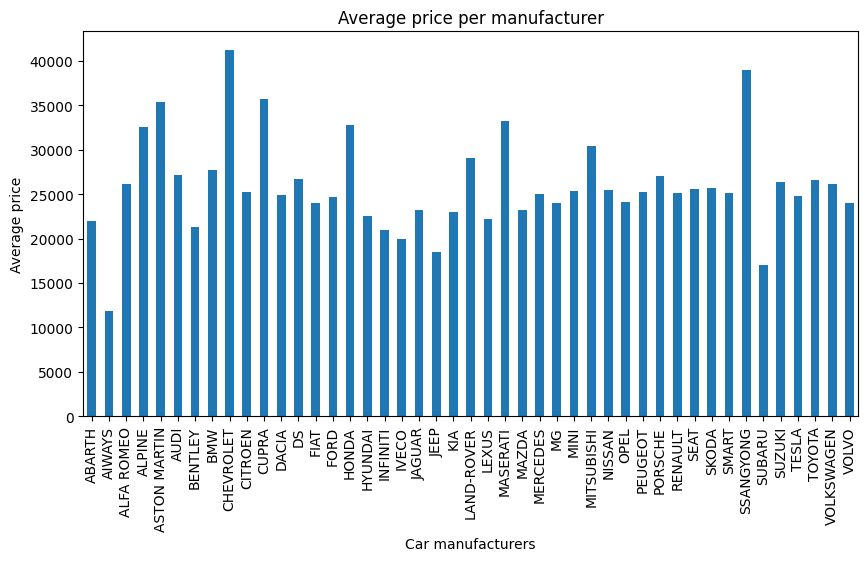

In [391]:
plt.figure(figsize=(10,5))
mean_prices.plot(kind='bar')
plt.xlabel('Car manufacturers')
plt.ylabel('Average price')
plt.title('Average price per manufacturer')
plt.show()

### Gearbox types over the years

<Figure size 1000x500 with 0 Axes>

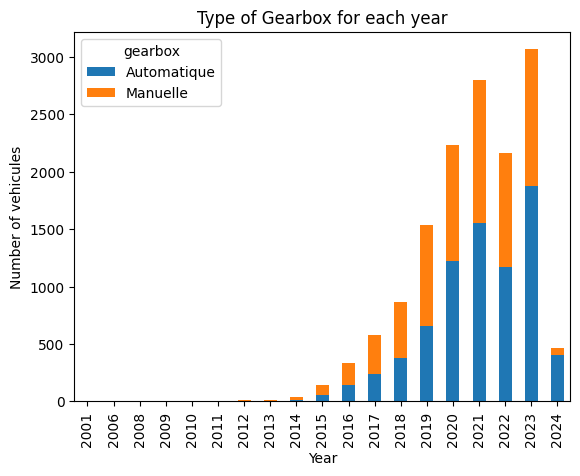

In [392]:
gears=pd.crosstab(df['year'],df['gearbox'])
plt.figure(figsize=(10,5))
gears.plot(kind='bar',stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of vehicules')
plt.title('Type of Gearbox for each year')
plt.show()

We can see that before 2024, the proportion of manual vehicles in France was approximately the same as that of automatic ones. However, in 2024, over 80% of vehicles sold are automatic — a sad reality for car guys.

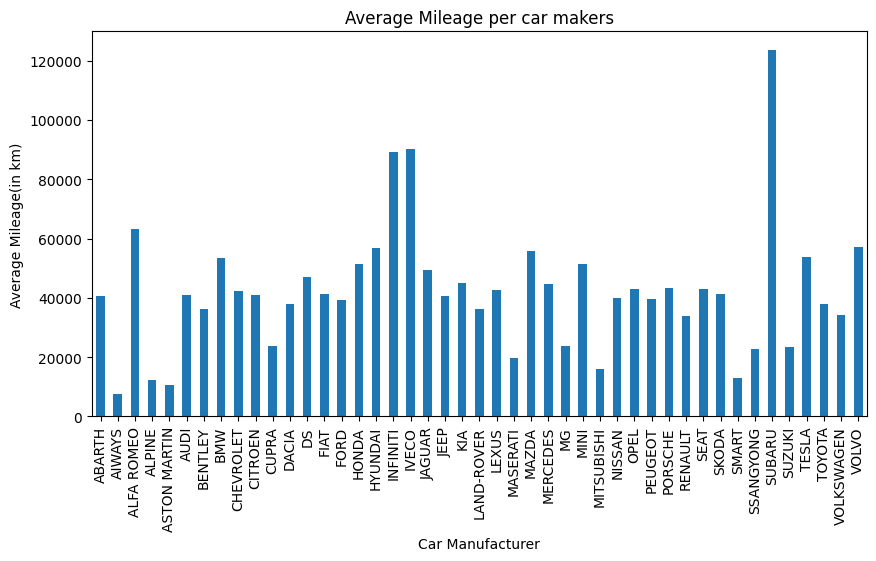

In [393]:
mean_km=df.groupby('mark')['km'].mean()
plt.figure(figsize=(10,5))
mean_km.plot(kind='bar')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average Mileage(in km)')
plt.title('Average Mileage per car makers')
plt.show()

"We can see that the car brand whose models have the highest average mileage is Subaru, with an average more than 120,000 km. On the other hand, brands like Aston Martin and Smart tend to have lower mileage, as their owners are usually older or belong to a higher social class."

## Decision Tree regressor model

We built a Decision Tree Regressor model to predict the price of a used car. The model recursively splits the data based on car characteristics such as mileage, year, gearbox type, fuel type, and additional features like isofix, LED lights, or cruise control. Each split aims to minimize the variance in price within the resulting groups, allowing the tree to capture non-linear interactions between features."

### Split the data

In [394]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.8, random_state=0)

In [396]:
model=XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=0)
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluate the model

In [399]:
Y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(Y_test, Y_pred))

MAE: 11537.951171875


The model is not that performant, the average prediction error is about 11537 € per car.